### Loading the libraries

In [102]:
import pandas as pd # data analytical library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

### Reading the test and train dataset

In [103]:
df=pd.read_csv("insurance_claim.csv")  # dataset

In [104]:
#Checking the dataframe for training data
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


#### Renaming the column names in train data as it is "unnamed" 

In [105]:
df=df.rename(columns={"Unnamed: 0":"ClaimNumber","Unnamed: 1":"DateTimeOfAccident","Unnamed: 3":"Age","Unnamed: 4":"Gender",
                      "Unnamed: 5":"MaritalStatus","Unnamed: 6":"DependentChildren","Unnamed: 8":"WeeklyWages",
                      "Unnamed: 9":"PartTimeFullTime","Unnamed: 10":"HoursWorkedPerWeek","Unnamed: 12":"ClaimDescription",
                      "Unnamed: 13":"InitialIncurredCalimsCost","Unnamed: 14":'UltimateIncurredClaimCost'},inplace=False)

#### Dropping the first row as it has the column names in train data

In [106]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


### Data Frame Summary

In [107]:
#for training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  obj

In [108]:
#Checking for Categorical Data in train data
df.select_dtypes(exclude=['int64','float64']).columns 

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'WeeklyWages', 'PartTimeFullTime',
       'HoursWorkedPerWeek', 'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

##### Changing the data type for some columns in train data

In [109]:
df['Age'] = pd.to_numeric(df['Age']) 
df['DependentChildren'] = pd.to_numeric(df['DependentChildren'])
df['DependentsOther'] = pd.to_numeric(df['DependentsOther'])
df['WeeklyWages'] = pd.to_numeric(df['WeeklyWages'])
df['HoursWorkedPerWeek'] = pd.to_numeric(df['HoursWorkedPerWeek'])
df['DaysWorkedPerWeek'] = pd.to_numeric(df['DaysWorkedPerWeek'])
df['InitialIncurredCalimsCost'] = pd.to_numeric(df['InitialIncurredCalimsCost'])
df['UltimateIncurredClaimCost'] = pd.to_numeric(df['UltimateIncurredClaimCost'])

##### To check if the data type changed or not 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  int64  
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  int64  
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  float64
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  float64
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  int

In [111]:
 #checking the description of train data
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,0.009537,416.471426,37.766820,4.905794,7743.593874,1.095282e+04
std,12.114729,0.525395,0.106163,243.875364,12.494323,0.547077,18223.698531,3.529614e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,0.000000,393.365000,38.000000,5.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,3.000000,7497.000000,640.000000,7.000000,830000.000000,4.027136e+06


##### Working on the train data

##### Checking the shape of dataset

In [112]:
df.shape 

(36176, 15)

##### Checking for duplicate values

In [113]:
df.duplicated().sum() 

0

##### Checking for missing values

In [114]:
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
dtype: int64

##### Using mean and mode imputation to treating the missing values 

In [115]:
df['WeeklyWages']=df['WeeklyWages'].fillna(df['WeeklyWages'].mean())
df['HoursWorkedPerWeek']=df['HoursWorkedPerWeek'].fillna(df['HoursWorkedPerWeek'].mean())
df['MaritalStatus']=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [116]:
#To verify if there are any more missing values
df.isnull().sum()

ClaimNumber                  0
DateTimeOfAccident           0
DateReported                 0
Age                          0
Gender                       0
MaritalStatus                0
DependentChildren            0
DependentsOther              0
WeeklyWages                  0
PartTimeFullTime             0
HoursWorkedPerWeek           0
DaysWorkedPerWeek            0
ClaimDescription             0
InitialIncurredCalimsCost    0
UltimateIncurredClaimCost    0
dtype: int64

##### Now there are no missing values 

##### Dividing the data into categorical and numerical data

In [117]:
df_num=df[['Age','DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
           'InitialIncurredCalimsCost','UltimateIncurredClaimCost', ]]
df_cat=df[['ClaimNumber', 'DateTimeOfAccident', 'DateReported','Gender' ,'MaritalStatus','PartTimeFullTime','ClaimDescription']]

##### For understanding categorical data 


In [118]:
df['MaritalStatus'].value_counts()

MaritalStatus
S    17472
M    15162
U     3542
Name: count, dtype: int64

In [119]:
df['Gender'].value_counts()

Gender
M    27919
F     8256
U        1
Name: count, dtype: int64

In [120]:
df['PartTimeFullTime'].value_counts()

PartTimeFullTime
F    32917
P     3259
Name: count, dtype: int64

In [121]:
df['ClaimDescription'].nunique()

20596

##### There are 20596 unique claims made.

In [122]:
df.ClaimNumber.count()

36176

##### The total number of claims filed is 36176.

In [123]:
df['ClaimNumber'].nunique()

29456

##### The total number of claims that were filed is 36176 but number of unique claims are 29456.

### Data Transformation

#### Data  binning

In [124]:
df['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 1        48
2        43
3        30
4        41
5        36
         ..
36172    20
36173    35
36174    52
36175    28
36176    29
Name: Age, Length: 36176, dtype: int64>

In [125]:
df['Age'].min()

13

In [126]:
df['Age'].max()

79

In [127]:
df['Age_Bin']=pd.cut(df['Age'],bins=[1,25,50,80] , labels=['Young','Middle-Age','Old'])

# Drop the original 'Age' column
df.drop(columns=['Age'], inplace=True)

# Rename the 'Age_Bin' column to 'Age'
df.rename(columns={'Age_Bin': 'Age'}, inplace=True)

# Encode the 'Age' column
age_mapping = {'Young': 1, 'Middle-Age': 2, 'Old': 3}
df['Age'] = df['Age'].map(age_mapping)

In [128]:
df['WeeklyWages'].value_counts

<bound method IndexOpsMixin.value_counts of 1         500.00
2         509.34
3         709.10
4         555.46
5         377.10
          ...   
36172     344.16
36173    1668.83
36174     204.87
36175     730.87
36176     200.00
Name: WeeklyWages, Length: 36176, dtype: float64>

In [129]:
df['WeeklyWages'].max()

7497.0

In [130]:
df['WeeklyWages'].min()

1.0

In [131]:
df['WeeklyWages_Bin']=pd.cut(df['WeeklyWages'],bins=[0,1000,2000,4000,7000,8000] , labels=['Low','Below Average','Average Wage','Above Average','High'])
df['WeeklyWages_Bin']

1                  Low
2                  Low
3                  Low
4                  Low
5                  Low
             ...      
36172              Low
36173    Below Average
36174              Low
36175              Low
36176              Low
Name: WeeklyWages_Bin, Length: 36176, dtype: category
Categories (5, object): ['Low' < 'Below Average' < 'Average Wage' < 'Above Average' < 'High']

 ## Exploratory Data Analysis : Univariate Analysis

In [132]:
#Checking the target variable 
df['UltimateIncurredClaimCost'].describe()

count    3.617600e+04
mean     1.095282e+04
std      3.529614e+04
min      1.218868e+02
25%      9.257424e+02
50%      3.373862e+03
75%      8.186852e+03
max      4.027136e+06
Name: UltimateIncurredClaimCost, dtype: float64

<Axes: xlabel='UltimateIncurredClaimCost', ylabel='Count'>

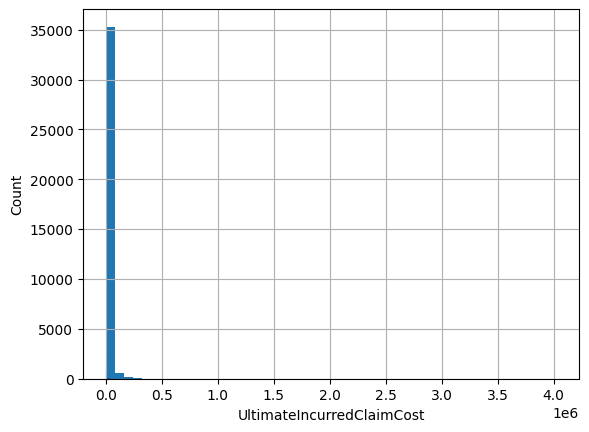

In [133]:
#Checking the skewness of the target variable 
df['UltimateIncurredClaimCost'].hist(bins=50)
sns.histplot(df['UltimateIncurredClaimCost'])

##### The data for UltimateIncurredClaimCost is right skewed.

In [134]:
df['InitialIncurredCalimsCost'].describe()

count     36176.000000
mean       7743.593874
std       18223.698531
min           1.000000
25%         700.000000
50%        2000.000000
75%        9500.000000
max      830000.000000
Name: InitialIncurredCalimsCost, dtype: float64

<Axes: xlabel='InitialIncurredCalimsCost', ylabel='Count'>

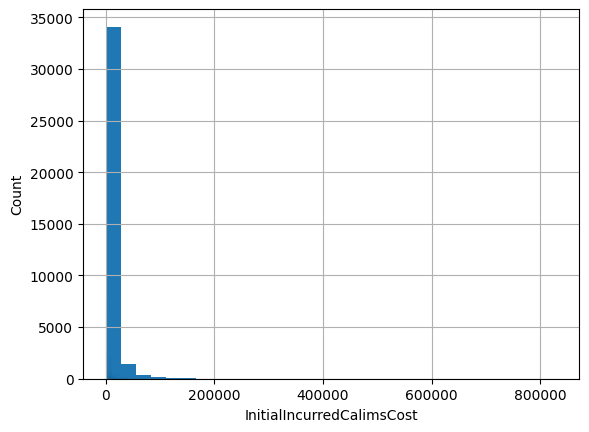

In [135]:
df['InitialIncurredCalimsCost'].hist(bins=30)
sns.histplot(df['InitialIncurredCalimsCost'])

##### The data for InitialIncurredClaimCost is right skewed.

<Axes: xlabel='Age', ylabel='Count'>

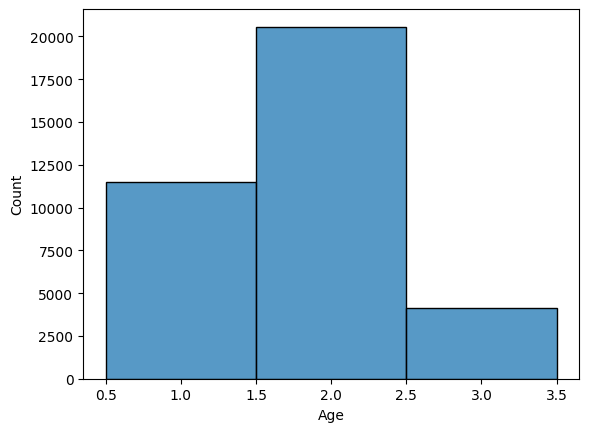

In [136]:
sns.histplot(df['Age'])

<Axes: xlabel='Age', ylabel='count'>

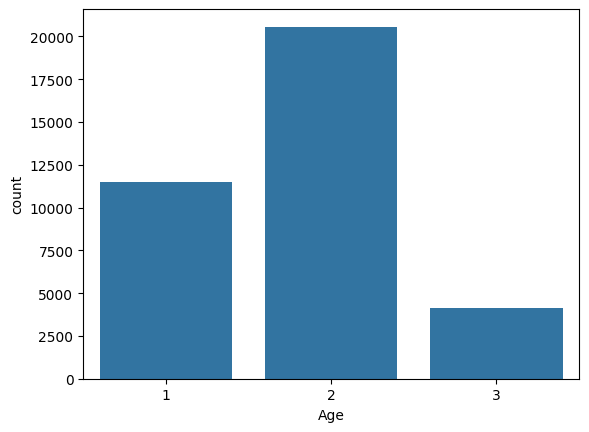

In [137]:
sns.countplot(x = 'Age', data = df)

In [138]:
df['Age'].value_counts(normalize=True)*100

Age
2    56.844317
1    31.750332
3    11.405352
Name: proportion, dtype: float64

##### From both the plots we can see that the claims are higher from the middle age group (25-40) which is roughly 57%. 

<Axes: xlabel='DependentChildren', ylabel='count'>

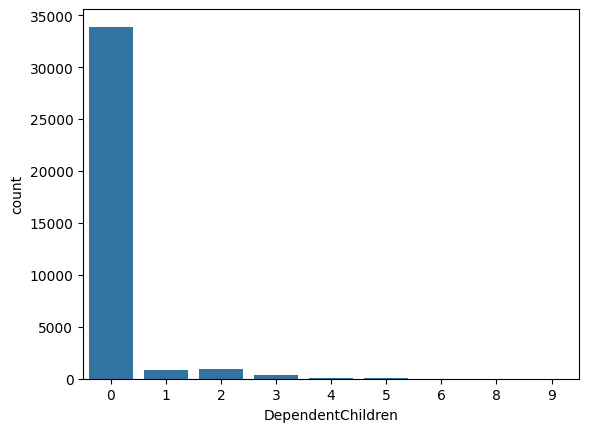

In [139]:
sns.countplot(x = 'DependentChildren', data = df)

In [140]:
df['DependentChildren'].value_counts(normalize=True)*100

DependentChildren
0    93.703008
2     2.554180
1     2.371738
3     0.975785
4     0.284719
5     0.093985
6     0.011057
9     0.002764
8     0.002764
Name: proportion, dtype: float64

##### The claims made from people with no children as dependents is high(Almost 94%).

<Axes: xlabel='DependentsOther', ylabel='count'>

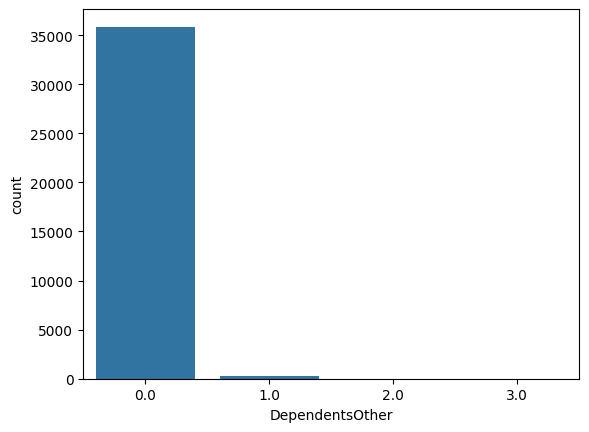

In [141]:
sns.countplot(x = 'DependentsOther', data = df)

In [142]:
df['DependentsOther'].value_counts(normalize=True)*100

DependentsOther
0.0    99.120964
1.0     0.820986
2.0     0.041464
3.0     0.016586
Name: proportion, dtype: float64

##### The claims made from people with no dependents is high (Almost 99%).

<Axes: xlabel='HoursWorkedPerWeek', ylabel='Count'>

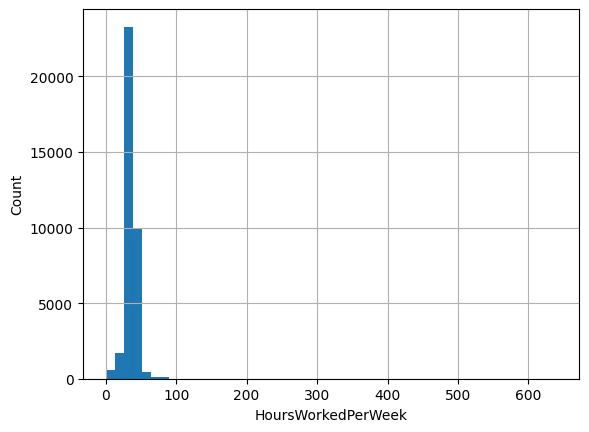

In [143]:
df['HoursWorkedPerWeek'].hist(bins=50)
sns.histplot(df['HoursWorkedPerWeek'])

##### The data for HoursWorkedPerWeek is positively skewed.

<Axes: xlabel='DaysWorkedPerWeek', ylabel='count'>

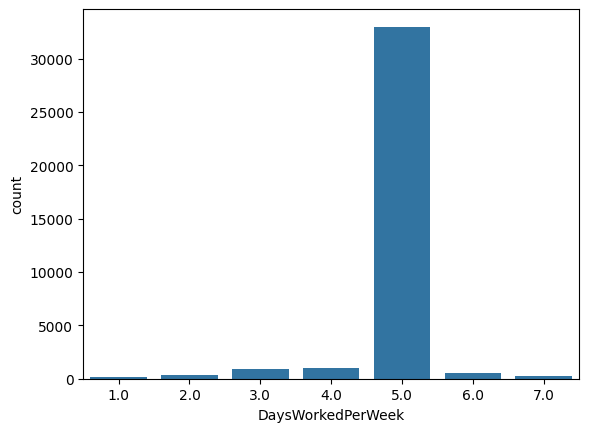

In [144]:
sns.countplot(x = 'DaysWorkedPerWeek', data = df)

In [145]:
df['DaysWorkedPerWeek'].value_counts(normalize=True)*100

DaysWorkedPerWeek
5.0    91.209642
4.0     2.750442
3.0     2.642636
6.0     1.561809
2.0     0.928793
7.0     0.577731
1.0     0.328947
Name: proportion, dtype: float64

##### From the above plot we can see that 91% of the people who have claimed for insurance work for 5 days a week. 

<Axes: xlabel='Gender', ylabel='count'>

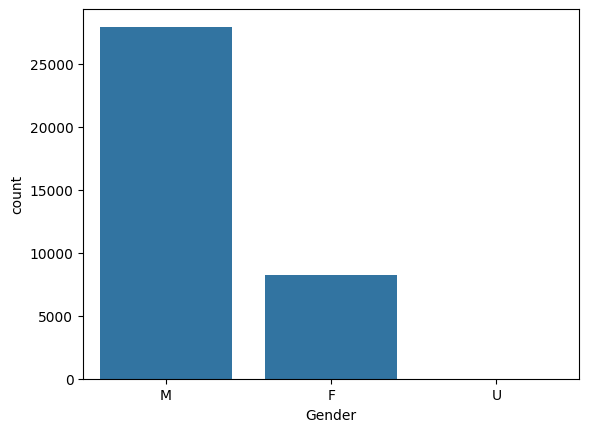

In [146]:
sns.countplot(x = 'Gender', data = df)

In [147]:
df['Gender'].value_counts(normalize=True)*100

Gender
M    77.175475
F    22.821760
U     0.002764
Name: proportion, dtype: float64

##### From the above plot we can see approximately 77% people who claimed for insurance are males while 22% are females.

<Axes: xlabel='MaritalStatus', ylabel='count'>

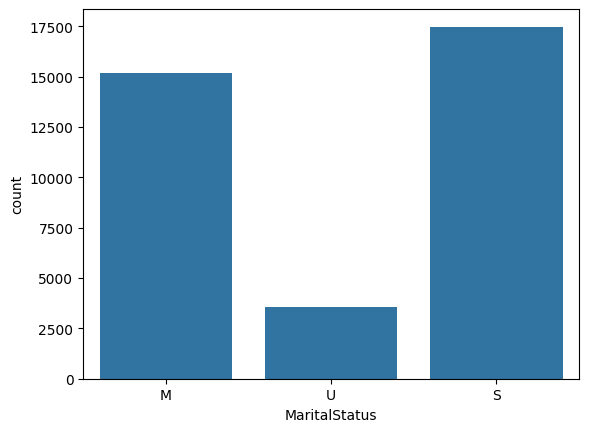

In [148]:
sns.countplot(x = 'MaritalStatus', data = df)

In [149]:
df['MaritalStatus'].value_counts(normalize=True)*100

MaritalStatus
S    48.297214
M    41.911765
U     9.791022
Name: proportion, dtype: float64

##### From the above plot we can see approximately 48% people who claimed for insurance are single while 41% are married and a very small percentage of people are unmarried.

<Axes: xlabel='PartTimeFullTime', ylabel='count'>

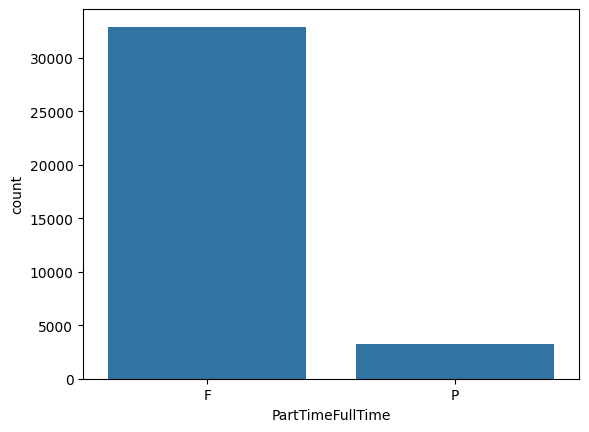

In [150]:
sns.countplot(x = 'PartTimeFullTime', data = df)

In [151]:
df['PartTimeFullTime'].value_counts(normalize=True)*100

PartTimeFullTime
F    90.991265
P     9.008735
Name: proportion, dtype: float64

##### From the above plot we can see approximately 91% of the people hold full time jobs.

<Axes: xlabel='WeeklyWages_Bin', ylabel='count'>

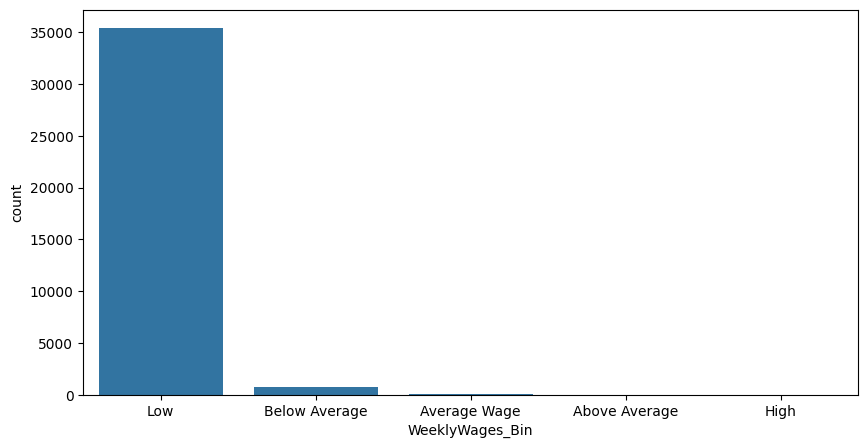

In [152]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'WeeklyWages_Bin', data = df)

In [153]:
df['WeeklyWages_Bin'].value_counts(normalize=True)*100

WeeklyWages_Bin
Low              97.910217
Below Average     1.973684
Average Wage      0.105042
Above Average     0.008293
High              0.002764
Name: proportion, dtype: float64

##### From the above plot we can see that most of the people who claimed for insurance have low wages 

## Bivariate analysis

<Axes: xlabel='Age', ylabel='UltimateIncurredClaimCost'>

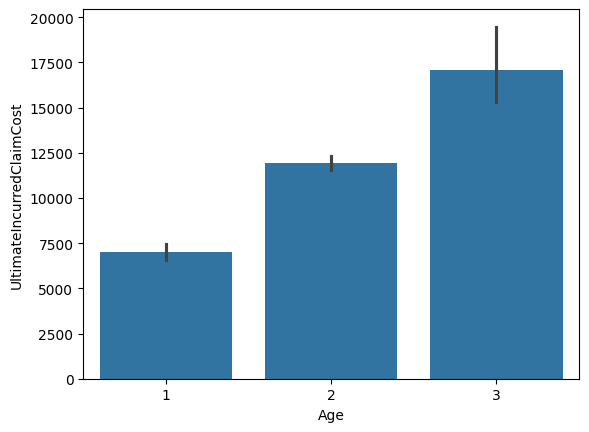

In [154]:
sns.barplot(x='Age',y='UltimateIncurredClaimCost',data=df)

##### People who are in the old age group (50-80) got more total claims payments by the insurance company. 

<Axes: xlabel='DependentChildren', ylabel='UltimateIncurredClaimCost'>

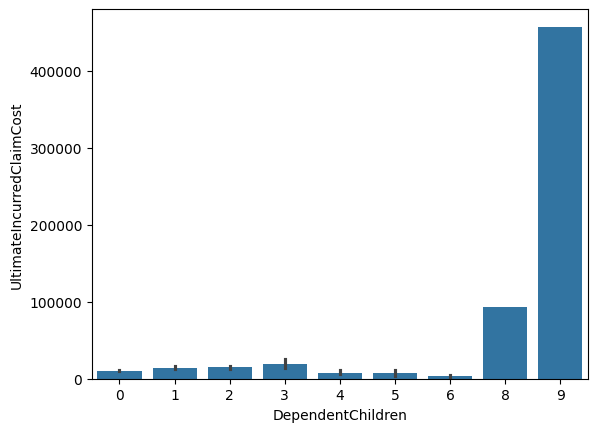

In [155]:
#plt.figure(figsize=(10,5))
sns.barplot(x='DependentChildren',y='UltimateIncurredClaimCost',data=df)
#plt.show()

##### People who have more children as dependents got more insurance payments from the insurance company.

<Axes: xlabel='DependentsOther', ylabel='UltimateIncurredClaimCost'>

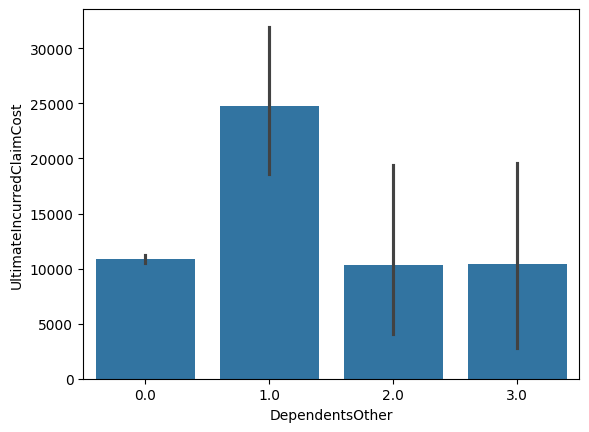

In [156]:
sns.barplot(x='DependentsOther',y='UltimateIncurredClaimCost',data=df)

<Axes: xlabel='WeeklyWages_Bin', ylabel='InitialIncurredCalimsCost'>

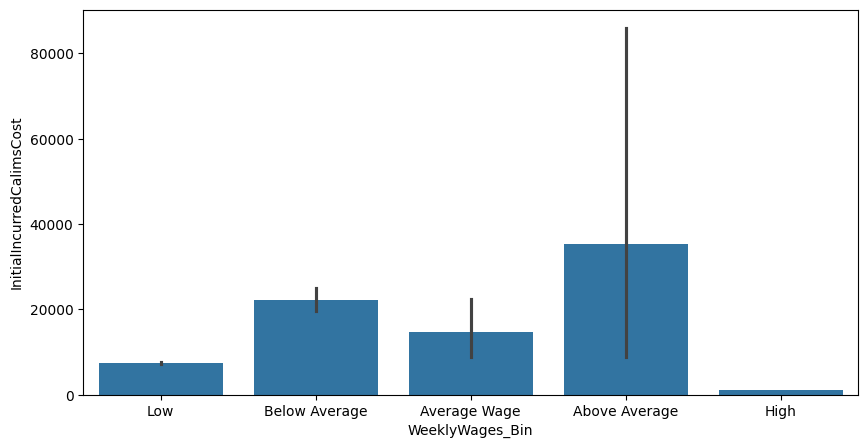

In [157]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='InitialIncurredCalimsCost',data=df)

##### People whose wages are above average claimed for more claim cost. 

<Axes: xlabel='WeeklyWages_Bin', ylabel='UltimateIncurredClaimCost'>

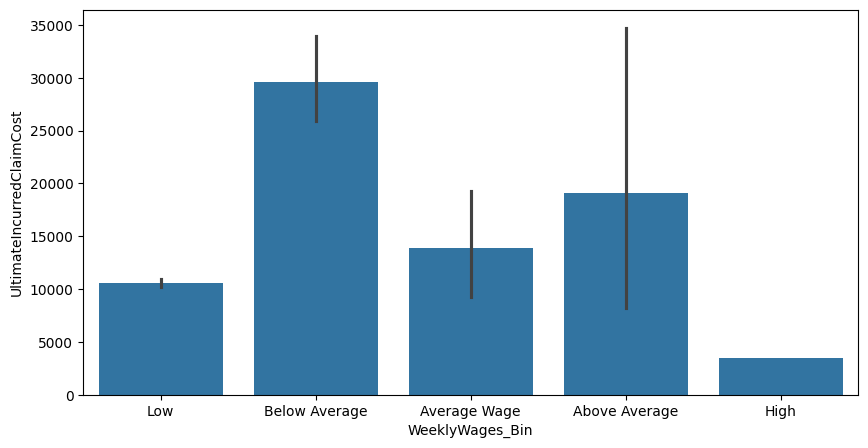

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(x='WeeklyWages_Bin',y='UltimateIncurredClaimCost',data=df)

##### People who's wages are below average and above average got more total claims payments by the insurance company.

<Axes: xlabel='DaysWorkedPerWeek', ylabel='UltimateIncurredClaimCost'>

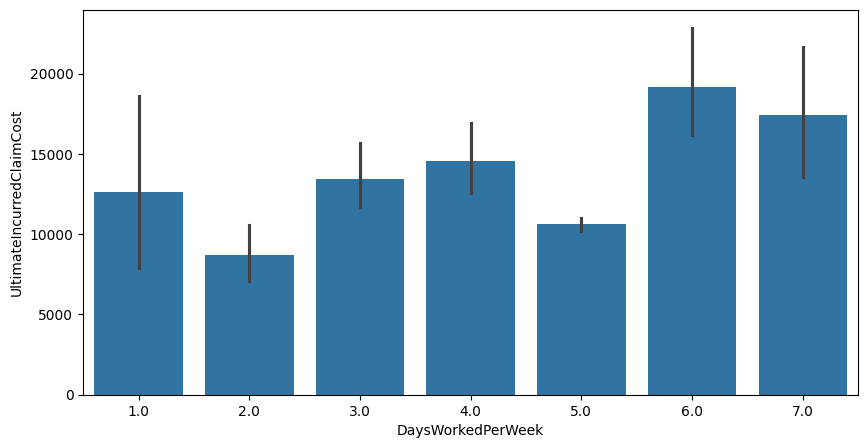

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(x='DaysWorkedPerWeek',y='UltimateIncurredClaimCost',data=df)

In [160]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age,WeeklyWages_Bin
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,M,M,0,0.0,500.00,F,38.0,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2,Low
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,2,Low
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,M,U,0,0.0,709.10,F,38.0,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,2,Low
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,M,S,0,0.0,555.46,F,38.0,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,2,Low
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,M,M,0,0.0,377.10,F,38.0,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,2,Low


In [161]:
df_drop=df.drop(columns=['WeeklyWages', 'WeeklyWages_Bin','HoursWorkedPerWeek','DaysWorkedPerWeek'])
df_drop.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,2
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,2
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,M,S,0,0.0,F,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,2
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,2


##### There is no correlation among the numerical columns. 

<Axes: xlabel='UltimateIncurredClaimCost', ylabel='Age'>

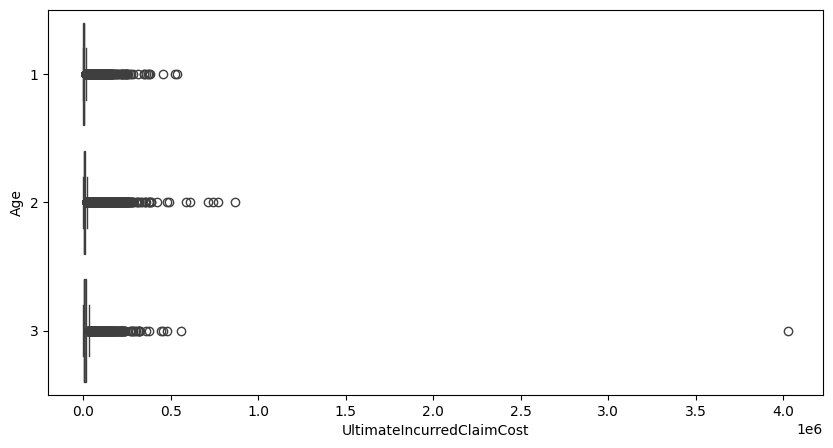

In [162]:
plt.figure(figsize=(10,5))
sns.boxplot(x='UltimateIncurredClaimCost', y='Age',data=df)

## Outlier Analysis

<Axes: >

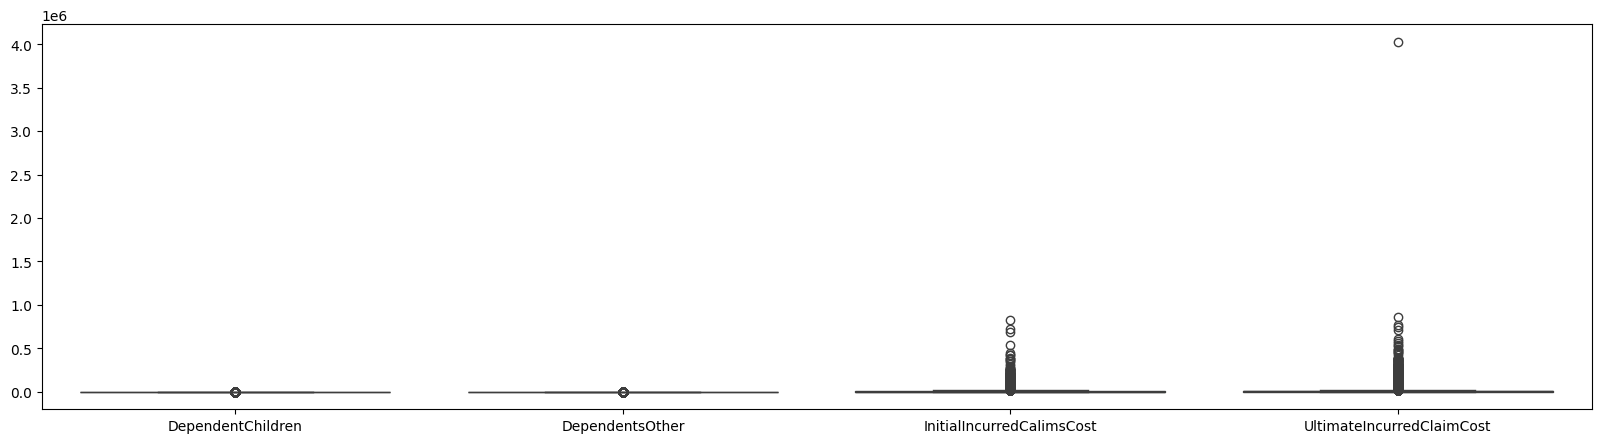

In [163]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

In [164]:
df_drop.shape

(36176, 12)

##### From the above boxplot we can see that there are a lot of outliers in "InitialIncurredCalimsCost" and "UltimateIncurredClaimCost".

In [165]:
for i in range(4):

    limit1=3*df_drop['InitialIncurredCalimsCost'].std()

    lower_limit1=df_drop['InitialIncurredCalimsCost'].mean()-limit1
    upper_limit1=df_drop['InitialIncurredCalimsCost'].mean()+limit1

    df_drop=df_drop[(df_drop['InitialIncurredCalimsCost']>lower_limit1)&(df_drop['InitialIncurredCalimsCost']<upper_limit1)]

    limit2=3*df_drop['UltimateIncurredClaimCost'].std()

    lower_limit2=df_drop['UltimateIncurredClaimCost'].mean()-limit2
    upper_limit2=df_drop['UltimateIncurredClaimCost'].mean()+limit2

    df_drop=df_drop[(df_drop['UltimateIncurredClaimCost']>lower_limit2)&(df_drop['UltimateIncurredClaimCost']<upper_limit2)]

<Axes: >

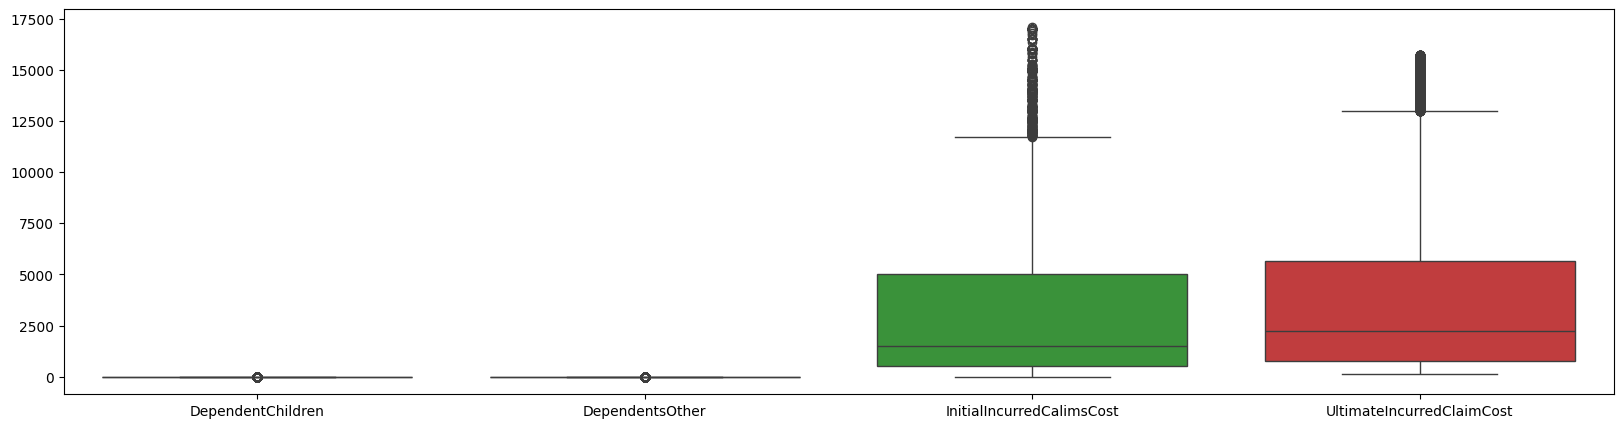

In [166]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_drop)

## Machine Learning Model

### Linear Regression Model

##### Importing the libraries for the modeling.

In [167]:
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=pre.LabelEncoder()
from sklearn.metrics import r2_score

In [168]:
final_df = df_drop
final_df.head(2)

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,2


In [169]:
final_df.select_dtypes(include='object').columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Gender',
       'MaritalStatus', 'PartTimeFullTime', 'ClaimDescription'],
      dtype='object')

In [170]:
final_df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,M,M,0,0.0,F,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,2
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,F,M,0,0.0,F,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,2
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,M,U,0,0.0,F,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,2
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,M,M,0,0.0,F,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,2
6,WC6842268,1999-06-21T11:00:00Z,1999-09-09T00:00:00Z,M,M,0,0.0,F,STRUCK HEAD ON HEAD LACERATED HEAD,500,598.762315,2


In [171]:
for x in final_df.select_dtypes(include='object').columns:
    final_df[x]=le.fit_transform(final_df[x])

In [172]:
final_df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age
1,21024,19823,5209,1,0,0,0.0,0,8789,1500,4748.203388,2
2,17294,15717,3979,0,0,0,0.0,0,13249,5500,6326.285819,2
3,12658,11856,2978,1,2,0,0.0,0,2341,1700,2293.949087,2
5,3368,3850,972,1,0,0,0.0,0,10618,2800,4014.002925,2
6,17062,16374,4208,1,0,0,0.0,0,14512,500,598.762315,2


In [173]:
final_df_scaled = final_df.apply(pre.minmax_scale)

In [174]:
min_value = final_df['UltimateIncurredClaimCost'].min()
max_value = final_df['UltimateIncurredClaimCost'].max()
print(min_value)
print(max_value)

121.8868054
15738.78367


In [175]:
final_df_scaled.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Age
1,0.822181,0.824653,0.803238,0.5,0.0,0.0,0.0,0.0,0.494988,0.087666,0.296238,0.5
2,0.676313,0.653840,0.613570,0.0,0.0,0.0,0.0,0.0,0.746170,0.321598,0.397288,0.5
3,0.495014,0.493219,0.459214,0.5,1.0,0.0,0.0,0.0,0.131843,0.099363,0.139084,0.5
5,0.131712,0.160163,0.149884,0.5,0.0,0.0,0.0,0.0,0.597995,0.163694,0.249225,0.5
6,0.667240,0.681171,0.648882,0.5,0.0,0.0,0.0,0.0,0.817301,0.029183,0.030536,0.5


In [176]:
X_scale = final_df_scaled.drop(['UltimateIncurredClaimCost'],axis='columns')

Y=final_df_scaled['UltimateIncurredClaimCost']

In [177]:
final_df_scaled.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther',
       'PartTimeFullTime', 'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost', 'Age'],
      dtype='object')

In [178]:
#Splitting the data into test and train data
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=42)

In [179]:
x_train.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Gender,MaritalStatus,DependentChildren,DependentsOther,PartTimeFullTime,ClaimDescription,InitialIncurredCalimsCost,Age
34517,0.305307,0.357101,0.340941,0.5,0.0,0.0,0.0,0.0,0.224600,0.818703,0.5
19689,0.295608,0.293535,0.271087,0.5,0.5,0.0,0.0,0.0,0.319441,0.024504,0.0
28975,0.015134,0.023796,0.022668,0.5,0.0,0.0,0.0,0.0,0.830424,0.292356,1.0
21162,0.939228,0.940012,0.921974,0.5,1.0,0.0,0.0,0.0,0.440809,0.555530,0.0
22099,0.760862,0.717115,0.675096,0.0,0.5,0.0,0.0,0.0,0.556601,0.292356,0.5


In [180]:
#checking the shape of the test and train set
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21375, 11), (9162, 11), (21375,), (9162,))

In [181]:
import sklearn.linear_model as lm

In [182]:
#creating the linear regression model
glm=lm.LinearRegression()

In [183]:
#Fitting the model
glm.fit(x_train,y_train)

LinearRegression()

In [184]:
#Checking the test score
glm.score(x_test,y_test)

0.6836878712717431

In [185]:
#Checking the train score
glm.score(x_train,y_train)

0.6759764794944614

In [186]:
# Checking the R square value
print ("R^2 is: \n", glm.score(x_test, y_test))

R^2 is: 
 0.6836878712717431


In [187]:
#Predictions on the test data set.
y_pred = glm.predict(x_test)

In [188]:
# Checking the RMSE score
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_pred,squared=False))

RMSE is: 
 0.12328929034903745


c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


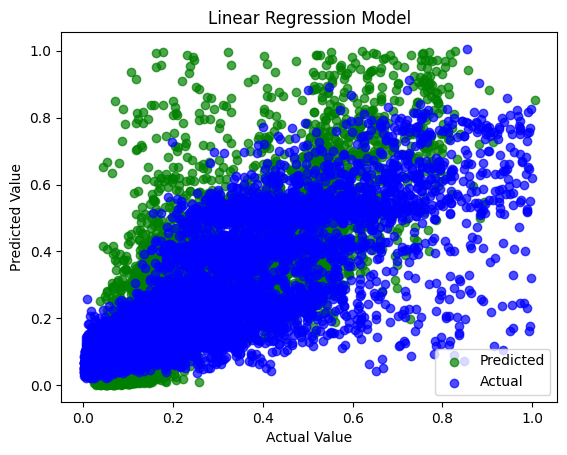

In [189]:
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are your predicted and actual values respectively
# Plotting the scatter plot between the predicted value and the actual values
plt.scatter(y_pred, y_test, alpha=.7, color='g', label='Predicted')  # Predicted values in green
plt.scatter(y_test, y_pred, alpha=.7, color='b', label='Actual')  # Actual values in blue
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression Model')
plt.legend()  # Adding legend for clarity
plt.show()


### Random Forest Regressor 

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [191]:
#checking the test score
rf.score(x_test,y_test)

0.7214725931601433

In [192]:
#Checking the r2 score
print ("R^2 is: \n", rf.score(x_test, y_test))

R^2 is: 
 0.7214725931601433


In [193]:
#checking the predicted value
y_pred2= rf.predict(x_test)
print ('RMSE is: \n', mean_squared_error(y_test, y_pred2,squared=False))

RMSE is: 
 0.11569148568955626


c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [194]:
# import pickle
# # Save the trained model to a file
# with open('rf_regressor_model.pkl', 'wb') as f:
#     pickle.dump(rf, f)